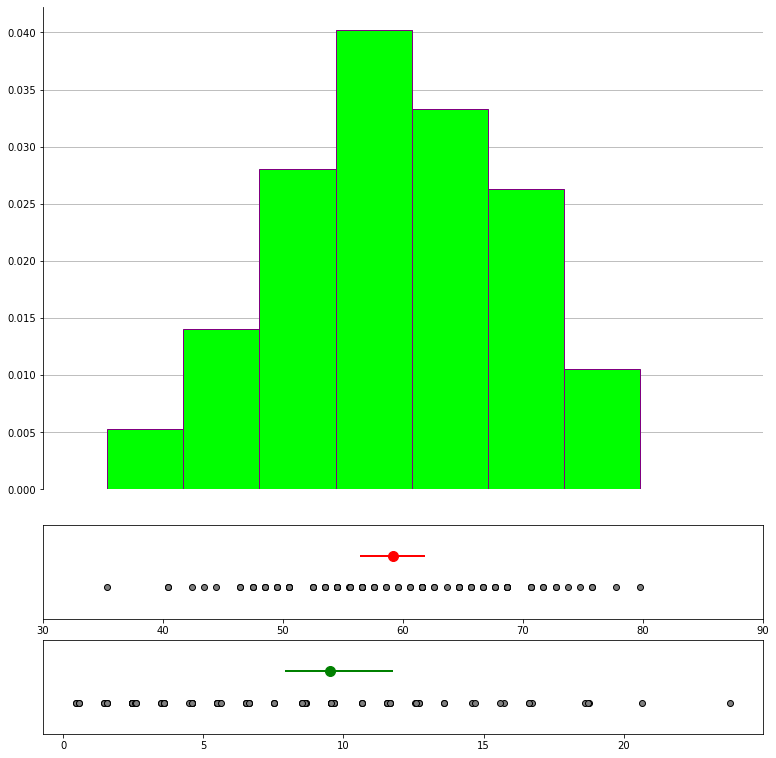

In [55]:
from scipy.stats import norm, t, chi2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

arr = np.array(pd.read_excel('Com.xlsx', index_col = 0).loc['Вариант №19'])

m = len(arr)
alpha = 0.99
mean, std = np.mean(arr), np.std(arr)
interval1 = [mean - std/np.sqrt(m)*t.ppf((1+alpha)/2, m-1), mean + std/np.sqrt(m)*t.ppf((1+alpha)/2, m-1)]
interval2 = [std*np.sqrt((m-1)/chi2.ppf((1+alpha)/2, m-1)), std*np.sqrt((m-1)/chi2.ppf((1-alpha)/2, m-1))]

arr2 = abs(arr-mean)

fig = plt.figure(figsize = [10, 10])
ax = fig.add_axes([0, 0.34, 1, 0.67])
ax.hist(arr, bins = 1+int(np.log2(m)), edgecolor = 'purple', facecolor = 'lime', density = True, zorder = 2)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])
ax.set_xlim([30, 90])
ax.grid()

ax = fig.add_axes([0, 0.16, 1, 0.13])
ax.set_ylim([0, 1])
ax.scatter(arr, [1/3 for i in arr], facecolor = 'gray', edgecolor = 'black')

ax.plot(interval1, [2/3, 2/3], color = 'red', linewidth = 2)
ax.scatter([mean], [2/3], color = 'red', s = 100)
ax.set_xlim([30, 90])
ax.set_yticks([])

ax = fig.add_axes([0, 0, 1, 0.13])
ax.set_ylim([0, 1])
ax.scatter(arr2, [1/3 for i in arr], facecolor = 'gray', edgecolor = 'black')

ax.plot(interval2, [2/3, 2/3], color = 'green', linewidth = 2)
ax.scatter([std], [2/3], color = 'green', s = 100)
ax.set_yticks([])

plt.show()